In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import img_to_array
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Mengimpor modul yang diperlukan
import os
import warnings;
warnings.filterwarnings('ignore');

### Load Dataset

In [21]:
data_dir= r'C:\Users\user01\Downloads\Advance Deep Learning\Tugas UTS\deep_learning_cnn_fruit_classification\archive'

### Data Prepration And Preprocessing

In [22]:
images_path=glob.glob(data_dir+'/**/*.jpg',recursive=True, root_dir=data_dir)

In [23]:
images_path[:5]

['G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_1.jpg',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_10.jpg',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_100.jpg',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_101.jpg',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done\\fresh_peach_102.jpg']

In [24]:
labels= []
for img in images_path :
    lab= os.path.dirname(img)
    labels.append(lab)

In [25]:
image_labels=[]
for label in labels:
    lab=label.split('/')[-1]
    image_labels.append(lab)

In [26]:
image_labels[:10]

['G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done',
 'G:\\My Drive\\Semester 2\\Advanced Deep Learning\\UTS\\archive\\fresh_peaches_done']

In [27]:
preprocessed_images = []


for file in images_path:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128,128))
    img = img / 255
    
    preprocessed_images.append(img)

In [28]:
X= np.array(preprocessed_images)

In [29]:
X.shape

(1655, 128, 128, 3)

Found 1655 files belonging to 6 classes.


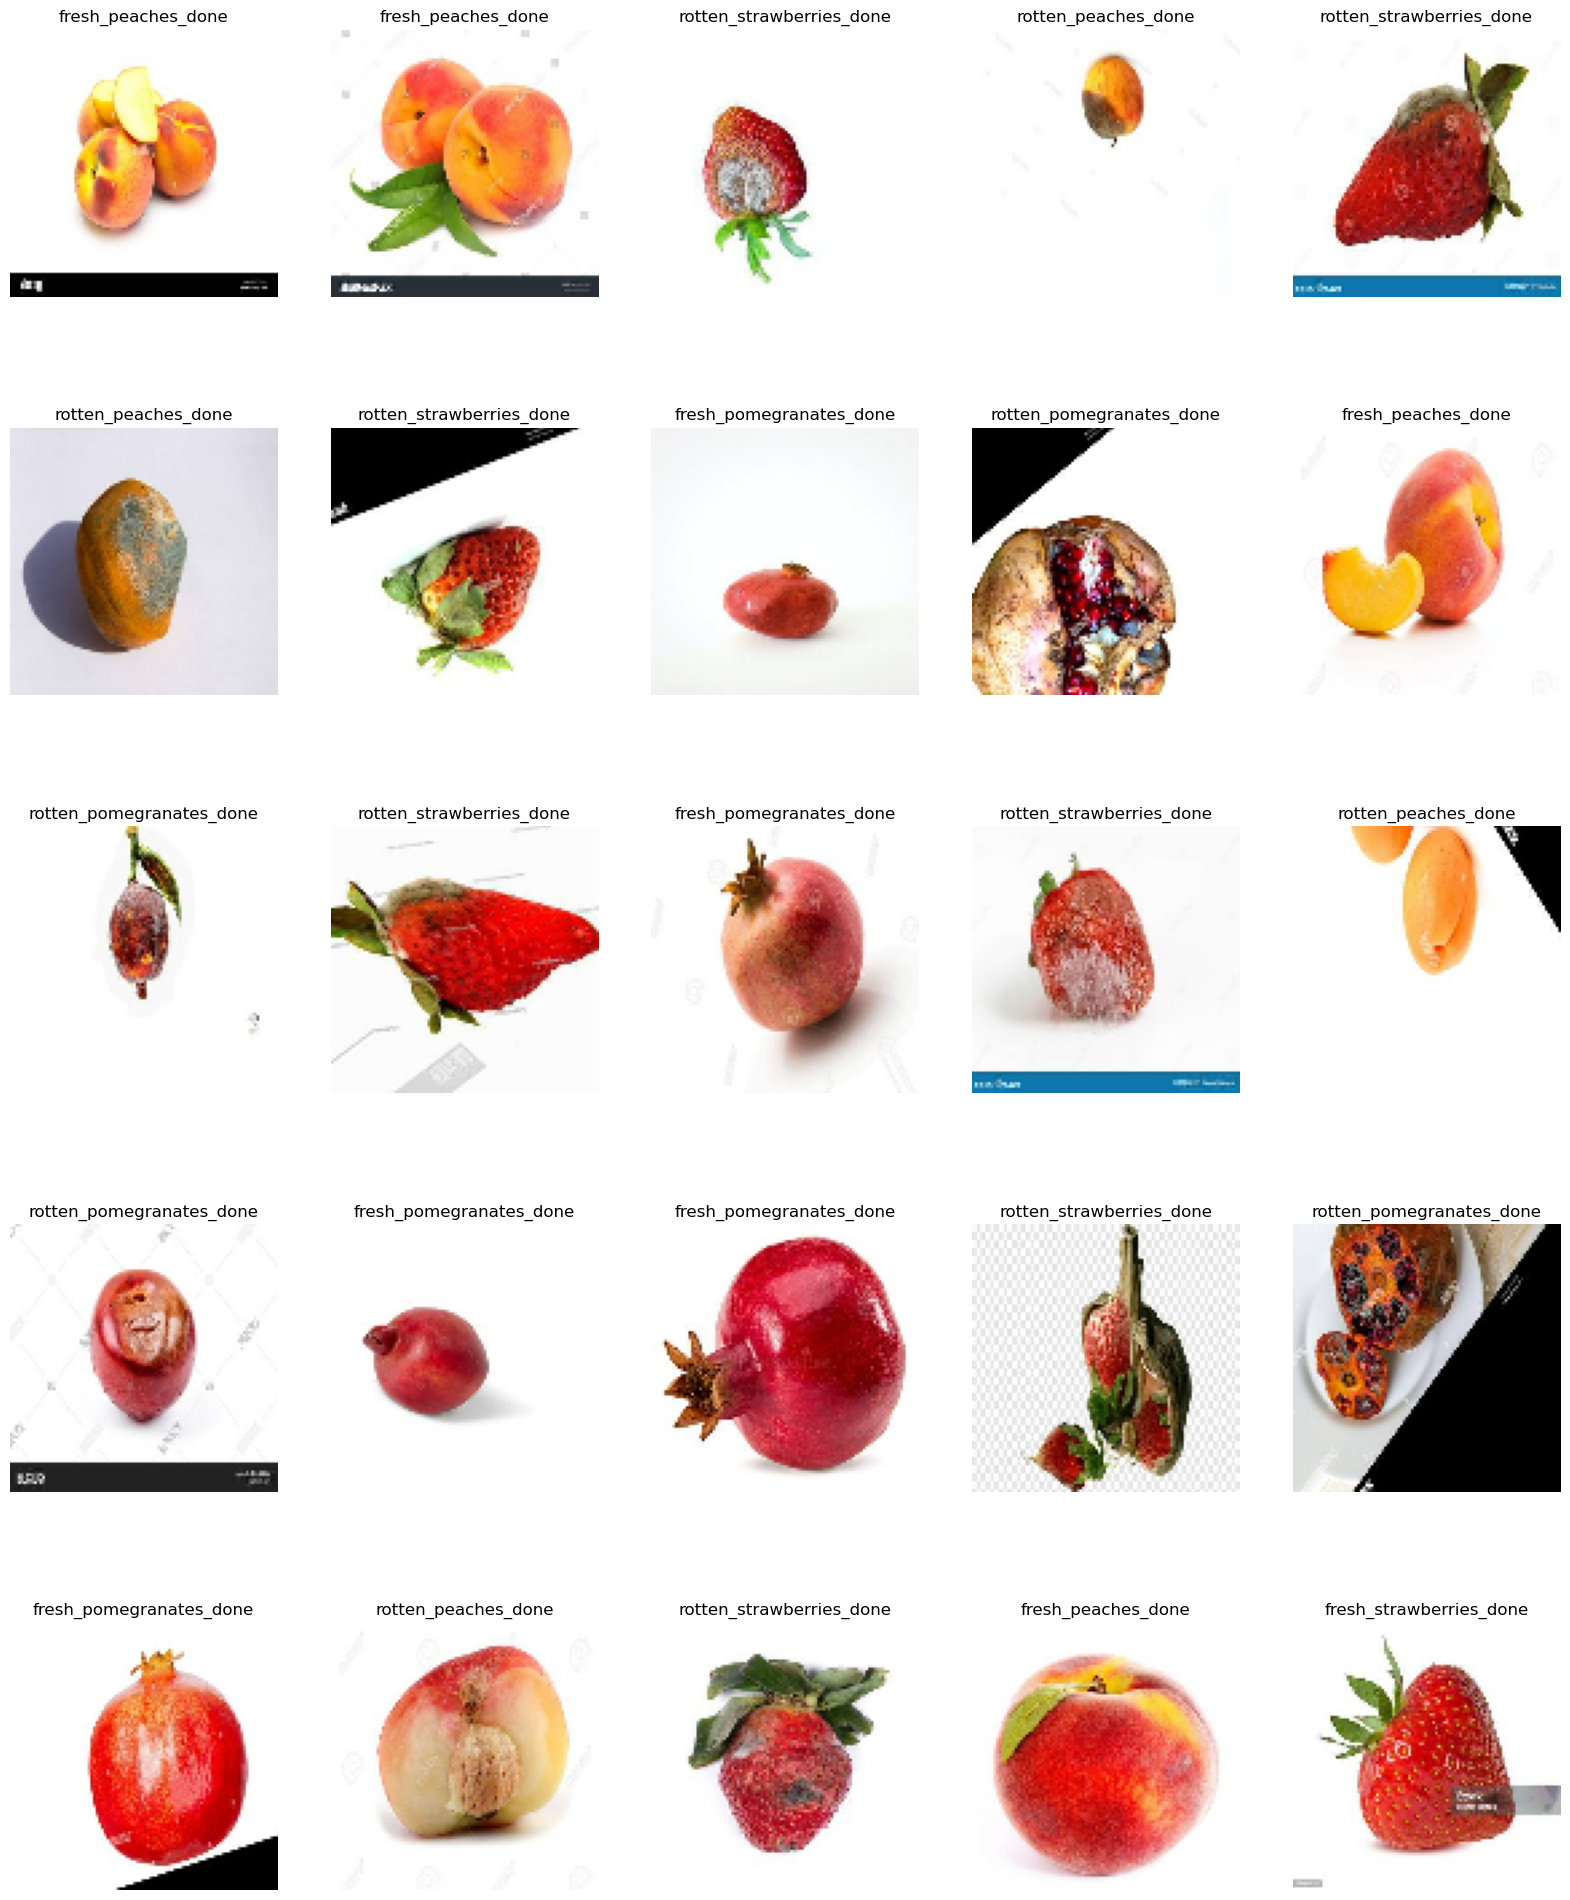

In [30]:
# visualize sample images
attribute = image_dataset_from_directory(data_dir, image_size=(100,100))
plt.figure(figsize=(20,25))
for image, labels in attribute.take(1):
  for i in range (25):
    plt.subplot(5,5, i + 1)
    plt.imshow(np.array(image[i]).astype("uint8"))
    plt.title(attribute.class_names[labels[i]])
    plt.axis("off")

In [31]:
y = np.array(image_labels)

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

### Splittin Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Modelling

### Best SGD Optimizer

### Dropout 20% in Fully Connected Layer

In [ ]:
# Function to build the CNN model with one hidden layer
def best_sgd_model_d20():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), # Tambahkan Convolutional Layer pertama dengan 32 filter, ukuran kernel 3x3, dan aktivasi ReLU
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),                 # Tambahkan Max Pooling Layer pertama dengan ukuran pool 2x2
        
        tf.keras.layers.Flatten(),                                      # Tambahkan Flatten Layer untuk meratakan output
        tf.keras.layers.Dense(64, activation='relu'),                   # Tambahkan Fully Connected Layer pertama dengan 64 neuron dan aktivasi ReLU
        tf.keras.layers.Dropout(0.2),                                   # Tambahkan dropout 20% pada Fully Connected Layer pertama
        tf.keras.layers.Dense(32, activation='relu'),                   # Tambahkan Fully Connected Layer kedua dengan 32 neuron dan aktivasi ReLU
        tf.keras.layers.Dropout(0.2),                                   # Tambahkan dropout 20% pada Fully Connected Layer pertama
        
        tf.keras.layers.Dense(6, activation='softmax')        # Tambahkan Fully Connected Layer untuk output dengan jumlah kelas sebagai output dan aktivasi softmax
    ])
   
    return model

In [ ]:
# Build the CNN model
model_sgd_d20 = best_sgd_model_d20()
# Menampilkan ringkasan model
model_sgd_d20.summary()

### Dropout 50% in Fully Connected Layer

In [ ]:
# Function to build the CNN model with one hidden layer
def best_sgd_model_d50():
    model = tf.keras.models.Sequential([
       tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), # Tambahkan Convolutional Layer pertama dengan 32 filter, ukuran kernel 3x3, dan aktivasi ReLU
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),                 # Tambahkan Max Pooling Layer pertama dengan ukuran pool 2x2
        
        tf.keras.layers.Flatten(),                                      # Tambahkan Flatten Layer untuk meratakan output
        tf.keras.layers.Dense(64, activation='relu'),                   # Tambahkan Fully Connected Layer pertama dengan 64 neuron dan aktivasi ReLU
        tf.keras.layers.Dropout(0.5),                                   # Tambahkan dropout 20% pada Fully Connected Layer pertama
        tf.keras.layers.Dense(32, activation='relu'),                   # Tambahkan Fully Connected Layer kedua dengan 32 neuron dan aktivasi ReLU
        tf.keras.layers.Dropout(0.5),                                   # Tambahkan dropout 20% pada Fully Connected Layer pertama
        
        tf.keras.layers.Dense(6, activation='softmax')        # Tambahkan Fully Connected Layer untuk output dengan jumlah kelas sebagai output dan aktivasi softmax
    ])
   
    return model

In [ ]:

# Build the CNN model
model_sgd_d50 = best_sgd_model_d50()
# Menampilkan ringkasan model
model_sgd_d50.summary()

### Train and evaluate the best model SGD Optimizer Dropout 20% in Fully Connected Layer

In [ ]:
model_sgd_d20.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_sgd_d20.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val))

In [ ]:
# Ambil loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

In [ ]:
# Plot kurva loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_sgd_d20.evaluate(X_val, y_val)
print("Model Validation Accuracy:", val_acc)

### Evaluating the Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_sgd_d20.evaluate(X_test,y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

### Train and evaluate the best model SGD Optimizer Dropout 50% in Fully Connected Layer

In [ ]:
# Compile model
model_sgd_d50.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Melatih model dengan data pelatihan dan validasi
history = model_sgd_d50.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val))

In [ ]:
# Ambil loss dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

In [ ]:
# Plot kurva loss
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Mengevaluasi kinerja model menggunakan data validasi
val_loss, val_acc = model_sgd_d50.evaluate(X_val, y_val)
print("Model Validation Accuracy:", val_acc)

### Evaluating The Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_sgd_d50.evaluate(X_test,y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')